<a href="https://colab.research.google.com/github/polaamgad88/Covid-stats/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Covid 2019 stats.csv to Covid 2019 stats (3).csv


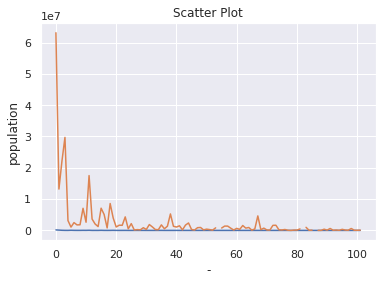

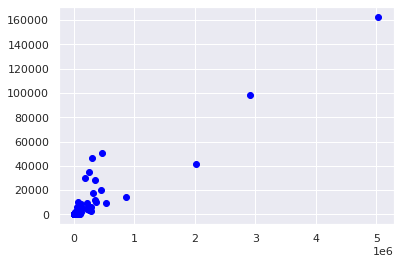

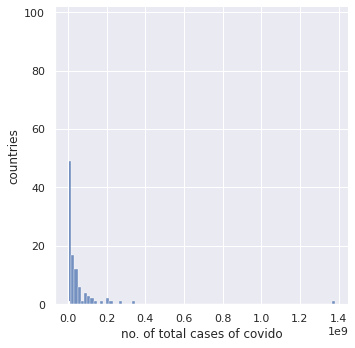

Co-efficient of linear regression [[8.21844124]]
Actual:  [190640.] predicted:  [163143.86191456] Fuel :  15194
Actual:  [62085.] predicted:  [150997.00576526] Fuel :  13716
Actual:  [16035.] predicted:  [50321.10060364] Fuel :  1466
Actual:  [203623.] predicted:  [87369.83370312] Fuel :  5974
Actual:  [53044.] predicted:  [112756.59868632] Fuel :  9063
Actual:  [8189.] predicted:  [67735.97758629] Fuel :  3585
Actual:  [75521.] predicted:  [151629.82574056] Fuel :  13793
Actual:  [92022.] predicted:  [195779.2920694] Fuel :  19165
Actual:  [35374.] predicted:  [95990.97856145] Fuel :  7023
Actual:  [31068.] predicted:  [69552.25309982] Fuel :  3806
Actual:  [104277.] predicted:  [105269.59871879] Fuel :  8152
Actual:  [9304.] predicted:  [48743.15988601] Fuel :  1274
Actual:  [117443.] predicted:  [72149.28053093] Fuel :  4122
Actual:  [60191.] predicted:  [61366.68562709] Fuel :  2810
Actual:  [17564.] predicted:  [79726.68335207] Fuel :  5044
Actual:  [102452.] predicted:  [59377.82

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


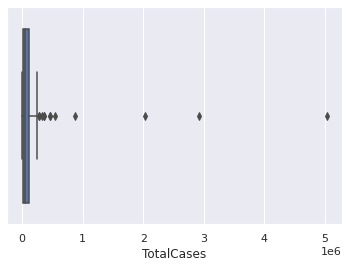

In [ ]:
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.tree import export_graphviz
#import graphviz
from google.colab import files
import io
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import quantile,random, where
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from scipy import stats

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

uploaded = files.upload()
data = io.BytesIO(uploaded['Covid 2019 stats.csv'])  
df = pd.read_csv('Covid 2019 stats.csv')



#df.head(20)
#df.describe() 
#df.info() 


#lie chart
# plot with day against tip
plt.plot(df['TotalDeaths'])
plt.plot(df['TotalTests'])

plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('-')
plt.ylabel('population')
  
plt.show()






#scatter plot
plt.scatter(df['TotalCases'],df['TotalDeaths'], c = "blue")
plt.show()




#hist defines populations of countries using seaborn
sns.set()
_ = sns.displot(df['Population'])




#hist defines total cases of covido using Matplot.plt
_ = plt.hist(df['TotalCases'])
_ = plt.xlabel('no. of total cases of covido')
_ = plt.ylabel ('countries')
plt.show()




#predictive analytic techniques 
df.dropna(how ='any',inplace=True)
x=df.iloc[:,8].values.reshape(-1,1)##Features
y = df.iloc[:,11].values.reshape(-1,1)#Values
CLS = linear_model.LinearRegression()
CLS.fit(x,y)
Prediction= CLS.predict(x)
print('Co-efficient of linear regression',CLS.coef_)
for i in range(len(Prediction)):
    print('Actual: ' , y[i] , 'predicted: ',Prediction[i] , 'Fuel : ',x[i,0] )
print('Mean Square Error', metrics.mean_squared_error(np.asarray(y), Prediction))






#predictive analytic techniques [multiple]//decision tree regresion



df.dropna(how ='any',inplace=True)
x=df.iloc[:,8:10]##Features
y = df.iloc[:,11].values.reshape(-1,1)#Values
CLS = tree.DecisionTreeRegressor()
CLS.fit(x,y)
Prediction= CLS.predict(x)

print('prediction value',Prediction)

print('Model features',CLS.feature_importances_)
for i in range(len(Prediction)):
    print('Actual: ' , y[i] , 'predicted: ',Prediction[i])

print('Mean Square Error', metrics.mean_squared_error(np.asarray(y), Prediction))

#export_graphviz(CLS,out_file='DecisionTree.dot')
#with open('DecisionTree.dot') as f:
 #   dot_graph=f.read()
#G=graphviz.Source(dot_graph)
#G.render()
#print('pdf of tree createrd')


#Anomly detection in 2 methods 


#Support vector machine
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)
X_train = training_set.iloc[:,2:10].values
Y_train = training_set.iloc[:,10].values
X_test = test_set.iloc[:,2:10].values
Y_test = test_set.iloc[:,10].values


classifier = SVC(kernel='rbf', random_state = 1) #intialize
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)


cmatrix = confusion_matrix(Y_test,Y_pred)
accuracy = float(cmatrix.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Covid Dataset 2019 : ", accuracy) #accuracy calculateions







#IQR
datasorted = np.sort(df['TotalCases'])
Q1 = np.percentile(df['TotalCases'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['TotalCases'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['TotalCases'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df['TotalCases']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)
IQR_graph = stats.iqr(df['TotalCases'], interpolation = 'midpoint')
IQR_graph

sns.boxplot(df['TotalCases'])

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import os
import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#text we do text mining on 
text = 'Its not only writers who can benefit from this free online tool. If you are a programmer who has working on a project where blocks of text are needed, this tool can be a great way to get that. Its a good way to test your programming and that the tool being created is working well. Above are a few examples of how the random paragraph generator can be beneficial. The best way to see if this random paragraph picker will be useful for your intended purposes is to give it a try. Generate a number of paragraphs to see if they are beneficial to your current project.If you do find this paragraph tool useful, please do us a favor and let us know how you are using it. Its greatly beneficial for us to know the different ways this tool is being used so we can improve it with updates. This is especially true since there are times when the generators we create get used in completely unanticipated ways from when we initially created them. If you have the time, please send us a quick note on what you would like to see changed or added to make it better in the future.'


#remove panctuation
text = text.translate(str.maketrans('','', string.punctuation))


#Tokenization
#first step of NLP , break strings into tokens
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

# finding the frequency distinct in the tokens
from nltk.probability import FreqDist
freqs = FreqDist(token)
freqs

# or find most common freqs
freqs1 = freqs.most_common(10)
freqs1



#Stemming
pst = PorterStemmer()
#stm = ["waited", "waiting", "waits"]
text=word_tokenize(text)
for word in text:
    print(pst.stem(word))




#lemmization
lemmatizer = WordNetLemmatizer() 
for word in text :
    print (lemmatizer.lemmatize(word))



stop_words = set(stopwords.words('english'))
result = [i for i in text if not i in stop_words]
print (result)







sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Thanks for great expreience , am so happy")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


it
not
onli
writer
who
can
benefit
from
thi
free
onlin
tool
If
you
are
a
programm
who
ha
work
on
a
project
where
block
of
text
are
need
thi
tool
can
be
a
great
way
to
get
that
it
a
good
way
to
test
your
program
and
that
the
tool
be
creat
is
work
well
abov
are
a
few
exampl
of
how
the
random
paragraph
gener
can
be
benefici
the
best
way
to
see
if
thi
random
paragraph
picker
will
be
use
for
your
intend
purpos
is
to
give
it
a
tri
gener
a
number
of
paragraph
to
see
if
they
are
benefici
to
your
current
projectif
you
do
find
thi
paragraph
tool
use
pleas
do
us
a
favor
and
let
us
know
how
you
are
use
it
it
greatli
benefici
for
us
to
know
the
differ
way
thi
tool
is
be
use
so
we
can
improv
it
with
updat
thi
is
especi
true
sinc
there
are
time
when
the
gener
we
creat
get
use
in
complet
unanticip
way
from
when
we
initi
creat
them
If
you
have
the
time
pleas
send
us
a
quick
note
on
what
you
would
like
to
see
chang
or
ad
to
make
it
better
in
the
futur
Its
not
only
writer
who
can
benefit
from
this
free
o

{'compound': 0.9143, 'neg': 0.0, 'neu': 0.254, 'pos': 0.746}